In [15]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
%matplotlib inline
sns.set()

In [16]:
data = loadmat('ex5data1.mat')
x = data['X']
y = data['y']
xval = data['Xval']
yval = data['yval']
xtest = data['Xtest']
ytest = data['ytest']
m = y.shape[0]

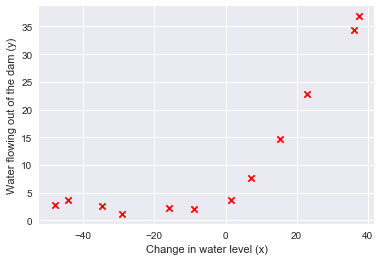

In [28]:
plt.scatter(x, y, s = 40, c = 'r', marker = 'x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')